# A Network Tour of Data Science

[Pierre Vandergheynst](https://people.epfl.ch/pierre.vandergheynst), *Full Professor*, and [Michaël Defferrard](http://deff.ch), *PhD student*, [EPFL](http://epfl.ch) [LTS2](http://lts2.epfl.ch).

# Exercise 5: Graph Signals and Fourier Transform

The goal of this exercise is to experiment with the notions of graph signals, graph Fourier transform and smoothness and illustrate these concepts in the light of clustering.

In [1]:
import numpy as np
import scipy.spatial
import matplotlib.pyplot as plt
%matplotlib inline

## 1 Graph

**Goal**: compute the combinatorial Laplacian $L$ of a graph formed with $c=2$ clusters.

**Step 1**: construct and visualize a fabricated data matrix $X = [x_1, \ldots, x_n]^t \in \mathbb{R}^{n \times d}$ whose lines are $n$ samples embedded in a $d$-dimensional Euclidean space.

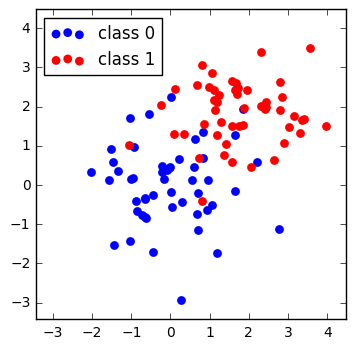

In [2]:
d = 2    # Dimensionality.
n = 100  # Number of samples.
c = 2    # Number of communities.

# Data matrix, structured in communities.
X = np.random.normal(0, 1, (n, d))
X += np.linspace(0, 2, c).repeat(n//c)[:, np.newaxis]

fig, ax = plt.subplots(1, 1, squeeze=True)
ax.scatter(X[:n//c, 0], X[:n//c, 1], c='b', s=40, linewidths=0, label='class 0');
ax.scatter(X[n//c:, 0], X[n//c:, 1], c='r', s=40, linewidths=0, label='class 1');
lim1 = X.min() - 0.5
lim2 = X.max() + 0.5
ax.set_xlim(lim1, lim2)
ax.set_ylim(lim1, lim2)
ax.set_aspect('equal')
ax.legend(loc='upper left');

**Step 2**: compute all $n^2$ pairwise euclidean distances $\operatorname{dist}(i, j) = \|x_i - x_j\|_2$.

Hint: you may use the function `scipy.spatial.distance.pdist()` and `scipy.spatial.distance.squareform()`.

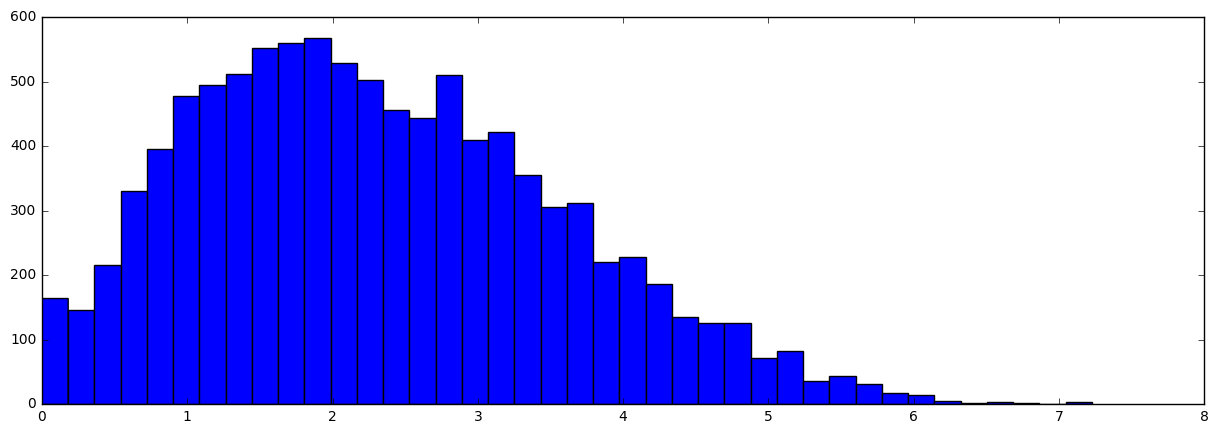

In [3]:
# Pairwise distances.
dist = YOUR CODE

plt.figure(figsize=(15, 5))
plt.hist(dist.flatten(), bins=40);

Step 3: order the distances and, for each sample, solely keep the $k=10$ closest samples to form a $k$ nearest neighbor ($k$-NN) graph.

Hint: you may sort a numpy array with `np.sort() or np.argsort()`.

In [4]:
k = 10  # Miminum number of edges per node.

dist = YOUR CODE

assert dist.shape == (n, k)

Step 4: compute the weights using a Gaussian kernel, i.e. $$\operatorname{weight}(i, j) = \exp\left(-\frac{\operatorname{dist}(i,j)^2}{\sigma^2}\right) = \exp\left(-\frac{\|x_i - x_j\|_2^2}{\sigma^2}\right).$$

Hint: you may use the below definition of $\sigma^2$.

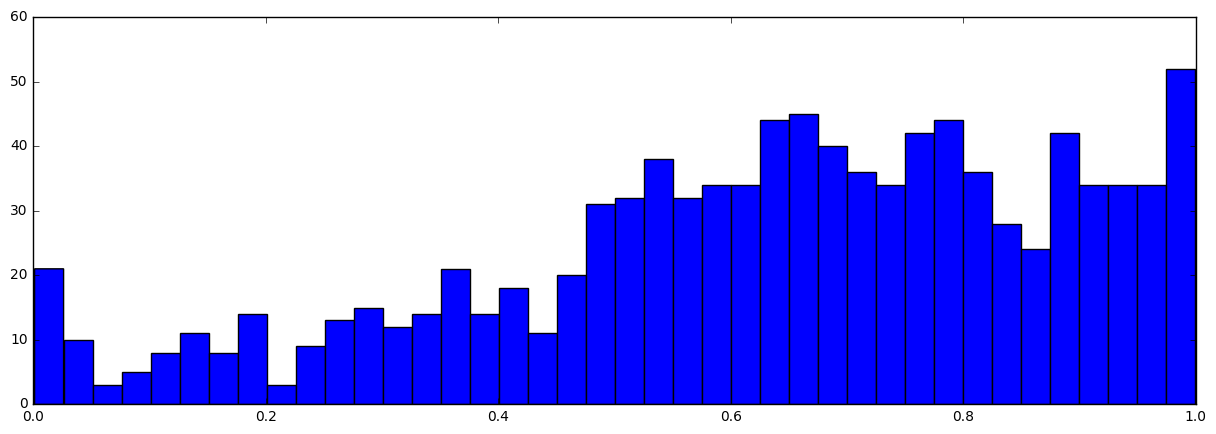

In [5]:
# Scaling factor.
sigma2 = np.mean(dist[:, -1])**2

# Weights with Gaussian kernel.
dist = YOUR CODE

plt.figure(figsize=(15, 5))
plt.hist(dist.flatten(), bins=40);

Step 5: construct and visualize the sparse weight matrix $W_{ij} = \operatorname{weight}(i, j)$.

Hint: you may use the function `scipy.sparse.coo_matrix()` to create a sparse matrix.

n = |V| = 100, k|V| < |E| = 1242


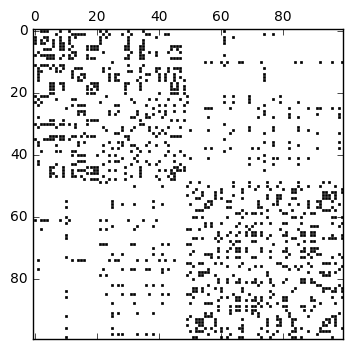

In [6]:
# Weight matrix.
I = YOUR CODE
J = YOUR CODE
V = YOUR CODE
W = scipy.sparse.coo_matrix((V, (I, J)), shape=(n, n))

# No self-connections.
W.setdiag(0)

# Non-directed graph.
bigger = W.T > W
W = W - W.multiply(bigger) + W.T.multiply(bigger)
assert type(W) == scipy.sparse.csr_matrix

print('n = |V| = {}, k|V| < |E| = {}'.format(n, W.nnz))
plt.spy(W, markersize=2, color='black');

Step 6: compute the combinatorial graph Laplacian $L = D - W$ where $D$ is the diagonal degree matrix $D_{ii} = \sum_j W_{ij}$.

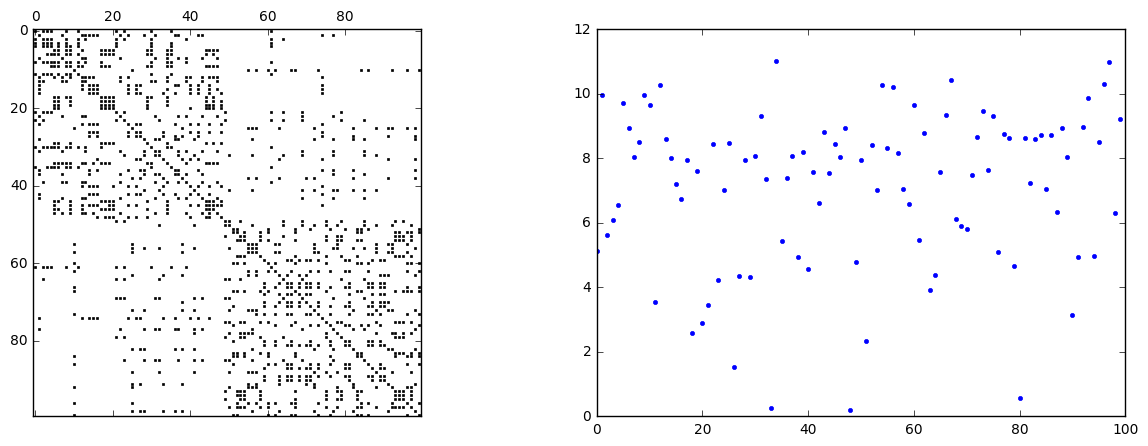

In [7]:
# Degree matrix.
D = YOUR CODE

# Laplacian matrix.
L = D - W

fig, axes = plt.subplots(1, 2, squeeze=True, figsize=(15, 5))
axes[0].spy(L, markersize=2, color='black');
axes[1].plot(D.diagonal(), '.');

## 2 Fourier Basis

Compute the eigendecomposition $L=U \Lambda U^t$ of the Laplacian, where $\Lambda$ is the diagonal matrix of eigenvalues $\Lambda_{\ell\ell} = \lambda_\ell$ and $U = [u_1, \ldots, u_n]^t$ is the graph Fourier basis.

Hint: you may use the function `np.linalg.eigh()`.

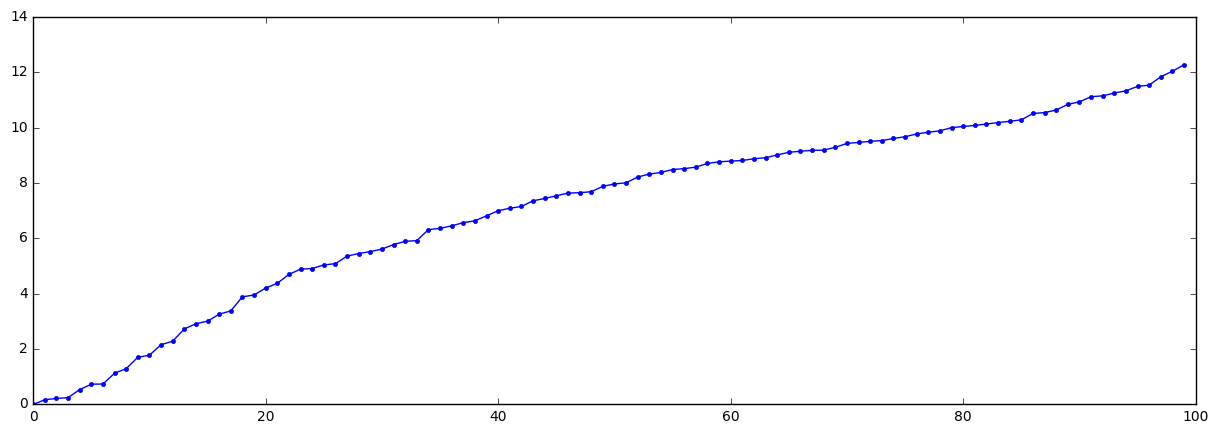

In [8]:
lamb, U = YOUR CODE

#print(lamb)
plt.figure(figsize=(15, 5))
plt.plot(lamb, '.-');

1. Visualize the eigenvectors $u_\ell$ corresponding to the first eight non-zero eigenvalues $\lambda_\ell$.
2. Can you explain what you observe and relate it to the structure of the graph ?

Hint: you may use the function `plt.scatter()`.

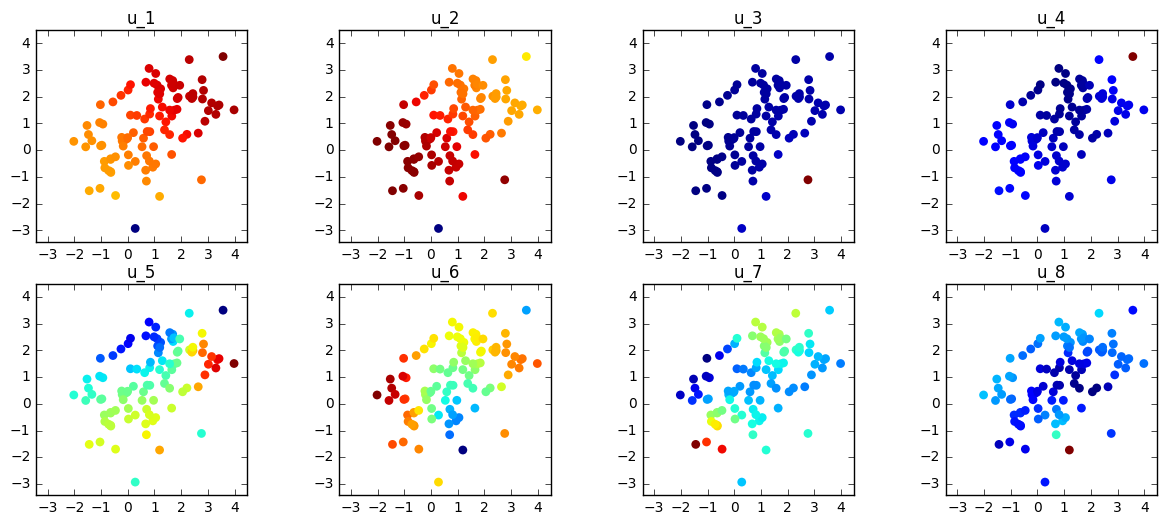

In [9]:
YOUR CODE

## 3 Graph Signals

1. Let $f(u)$ be a positive and non-increasing function of $u$.
2. Compute the graph signal $x$ whose graph Fourier transform satisfies $\hat{x}(\ell) = f(\lambda_\ell)$.
3. Visualize the result.
4. Can you interpret it ? How does the choice of $f$ influence the result ? 

In [ ]:
def f1(u):
    YOUR CODE
    return y

xhat = f(lamb)

x = YOUR CODE